# Multil-class Dog Breed Classification

# 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

# 2. Data
The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

# 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

# 4. Features
Some information about the data:

We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
There are 120 breeds of dogs (this means there are 120 different classes).
There are around 10,000+ images in the training set (these images have labels).
There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [ ]:
# Unzip the uploaded data into Google Drive
#!unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

# Get our workspace ready


In [33]:
# Import PyTorch
import torch

# Print PyTorch version
print("PyTorch version:", torch.__version__)


PyTorch version: 2.2.1+cu121


# Getting our data ready (turning into a form to be able to train)
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [34]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/DOG VISION/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [35]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: xlabel='breed'>

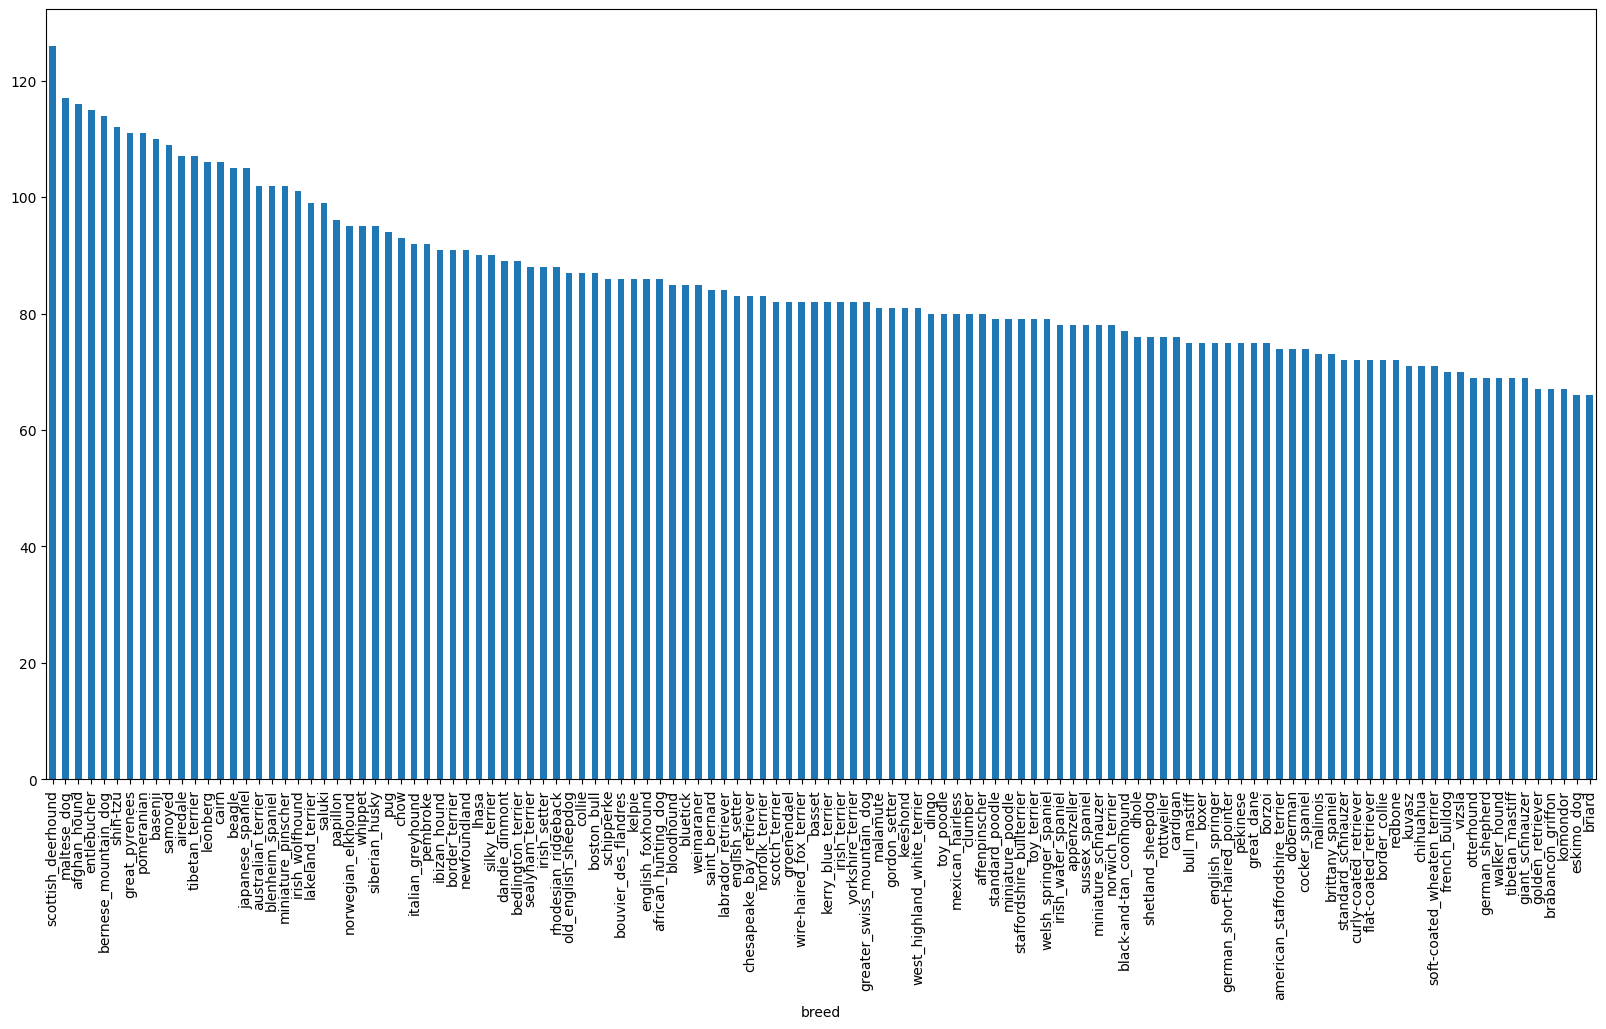

In [36]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [37]:
# What's the median number of images per class?
labels_csv["breed"].value_counts().median()

82.0

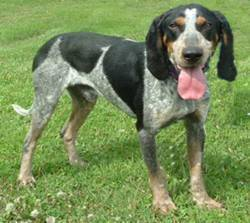

In [184]:
# Let's view an image
from IPython.display import Image
Image("drive/MyDrive/DOG VISION/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg")

# Getting images and their labels
Let's get a list of all of our image file pathnames.

In [39]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [40]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/DOG VISION/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['drive/MyDrive/DOG VISION/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DOG VISION/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DOG VISION/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DOG VISION/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DOG VISION/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DOG VISION/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DOG VISION/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DOG VISION/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DOG VISION/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DOG VISION/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [41]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/DOG VISION/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


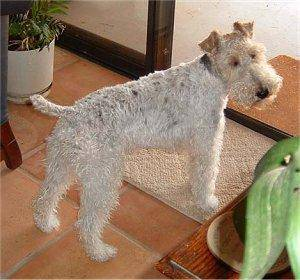

In [42]:
# One more check
Image(filenames[7000])

In [43]:
labels_csv["breed"][7000]

'wire-haired_fox_terrier'

# Since we've now got our training image filepaths in a list, let's prepare our labels.

In [44]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) # does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [45]:
len(labels)

10222

In [46]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [47]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [48]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [49]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [50]:
len(labels)

10222

In [51]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [52]:
len(boolean_labels)

10222

In [53]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [54]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [55]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [56]:
filenames[:10]

['drive/MyDrive/DOG VISION/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DOG VISION/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DOG VISION/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DOG VISION/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DOG VISION/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DOG VISION/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DOG VISION/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DOG VISION/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DOG VISION/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DOG VISION/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

# Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [57]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [58]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images and increase as needed.

In [59]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [61]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [62]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['drive/MyDrive/DOG VISION/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/DOG VISION/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/DOG VISION/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/DOG VISION/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/DOG VISION/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

We'll create a function to:

1. Take an image filepath as input
2. Use Torchvision and PIL to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

In [76]:
import torch
from torchvision import transforms
from PIL import Image

# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file path and turns the image into a Tensor.
    """
    # Open image
    image = Image.open(image_path)
    # Define transformations
    preprocess = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
    ])
    # Apply transformations
    image = preprocess(image)
    return image


#Another Transform image

In [64]:
import torch
from torchvision import transforms
from PIL import Image

# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file path and turns the image into a Tensor.
    """
    # Open the image file
    image = Image.open(image_path)
    # Define transformations
    preprocess = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        # Normalize the image with ImageNet statistics
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    # Apply transformations
    image = preprocess(image)

    return image


# Turning our data into batches
Why turn our data into batches?

1. Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

2. So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

3. In order to use Pytorch effectively, we need our data in the form of Tensor tuples which look like this: (image, label).

In [65]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [66]:
# Demo of the above
(process_image(X[42]), torch.tensor(y[42]))

(tensor([[[-0.7137, -0.9705, -0.9705,  ..., -0.8335, -0.8164, -0.8164],
          [-0.9877, -1.0048, -0.8507,  ..., -0.8849, -0.8678, -0.8507],
          [-1.1589, -1.0219, -0.8507,  ..., -0.9705, -0.9192, -0.8678],
          ...,
          [-2.0837, -2.0494, -2.0323,  ..., -0.2342, -0.0116,  0.0227],
          [-2.0837, -2.0494, -2.0494,  ..., -0.4911, -0.2513, -0.1486],
          [-1.8953, -1.8953, -1.9124,  ..., -0.5938, -0.4397, -0.2171]],
 
         [[ 0.2227, -0.0399, -0.0224,  ...,  0.2577,  0.2927,  0.3102],
          [-0.0399, -0.0749,  0.0826,  ...,  0.2052,  0.2402,  0.2577],
          [-0.2325, -0.0749,  0.1001,  ...,  0.1176,  0.1702,  0.2227],
          ...,
          [-1.8782, -1.8431, -1.8256,  ..., -0.2325, -0.0224,  0.0126],
          [-1.9132, -1.8606, -1.8606,  ..., -0.4951, -0.2500, -0.1625],
          [-1.7556, -1.7206, -1.7206,  ..., -0.6176, -0.4601, -0.2500]],
 
         [[-0.3753, -0.6715, -0.6890,  ..., -0.3404, -0.3055, -0.3055],
          [-0.5670, -0.6193,

In [77]:
#create data batches


def create_data_batches(X, y=None, batch_size=32, valid_data=False, test_data=False):
    """
    Creates batches of data out of image (X) and label (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input (no labels).
    """
    # If test data, only use filepaths
    if test_data:
        print("Creating test data batches...")
        dataset = torch.utils.data.TensorDataset(torch.stack([process_image(path) for path in X]))
        data_batch = DataLoader(dataset, batch_size=batch_size)
        return data_batch

    # If validation data, don't shuffle
    elif valid_data:
        print("Creating validation data batches...")
        dataset = torch.utils.data.TensorDataset(torch.stack([process_image(path) for path in X]), torch.tensor(y))
        data_batch = DataLoader(dataset, batch_size=batch_size)
        return data_batch

    else:
        print("Creating training data batches...")
        # Combine filepaths and labels into tensors
        dataset = torch.utils.data.TensorDataset(torch.stack([process_image(path) for path in X]), torch.tensor(y))
        # Shuffle data (training)
        data_batch = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        return data_batch

In [68]:
from torch.utils.data import DataLoader

In [78]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


# Also creating batches of full data

In [ ]:
# Create a data batch with the full data set
#full_data = create_data_batches(X,y)

In [72]:
import warnings
warnings.filterwarnings("ignore")


# Visualizing Data Batches
Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [79]:
import matplotlib.pyplot as plt

def show_25_images(images, labels, unique_breeds):
    """
    Displays a plot of 25 images and their labels from a data batch.
    """
    # Setup the figure
    plt.figure(figsize=(10, 10))
    # Loop through 25 (for displaying 25 images)
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1)
        # Display an image
        plt.imshow(images[i].permute(1, 2, 0))  # Permute channels to match matplotlib's expectation
        # Get the label from the boolean array
        label_idx = labels[i].nonzero()[0].item()
        label_name = unique_breeds[label_idx]
        # Add the image label as the title
        plt.title(label_name)
        # Turn the grid lines off
        plt.axis("off")

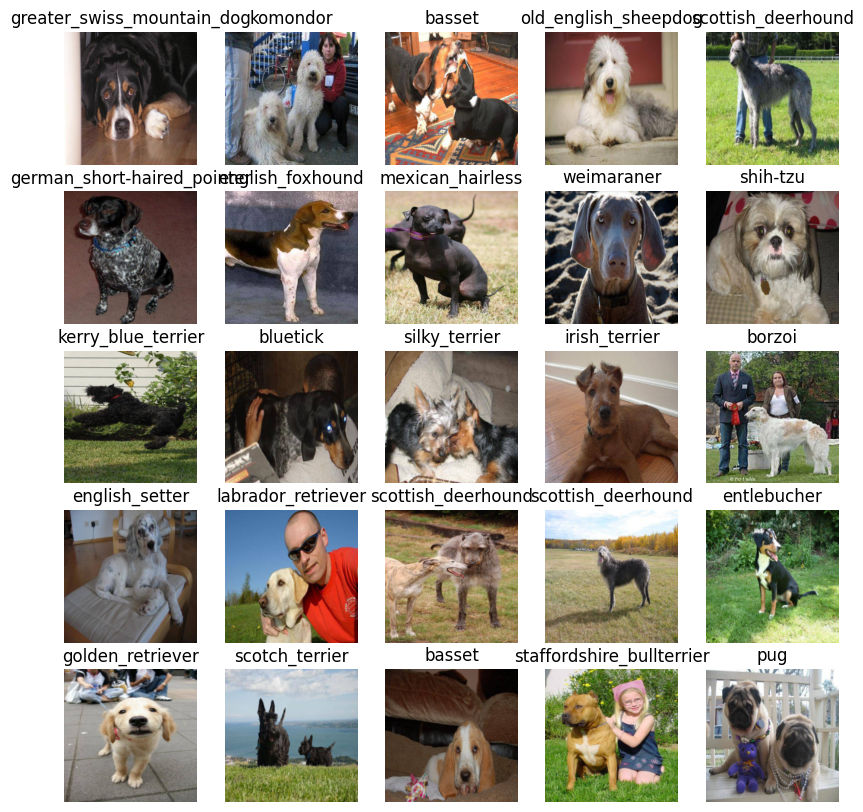

In [80]:
# Get the first batch of training data
train_images, train_labels = next(iter(train_data))

# Show the first 25 images and labels
show_25_images(train_images, train_labels, unique_breeds)

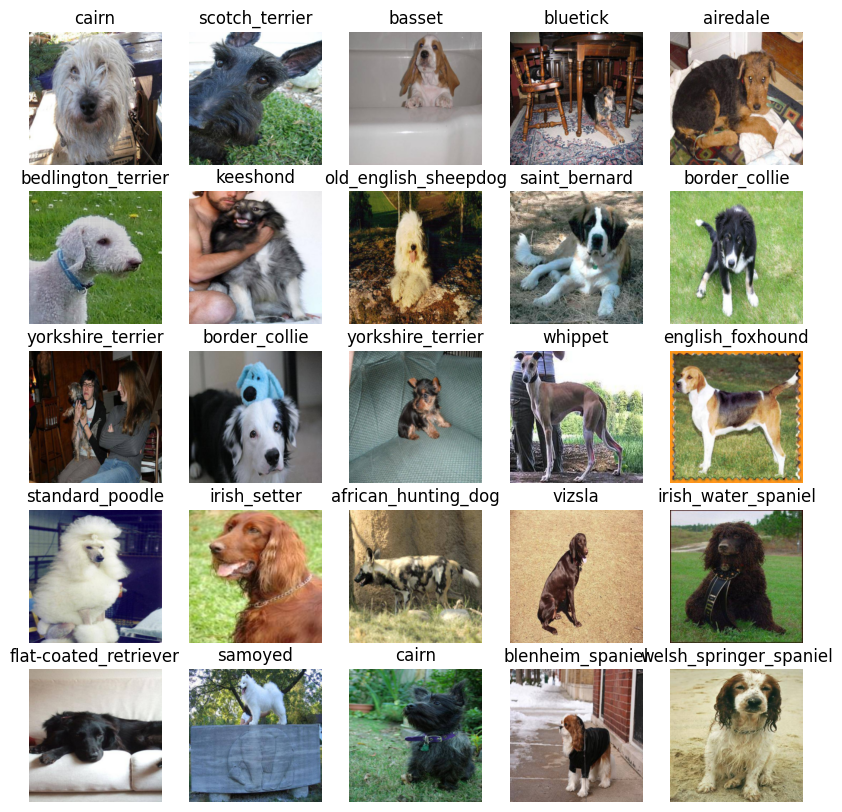

In [81]:
# Get the first batch of training data
val_images, val_labels = next(iter(val_data))

# Show the first 25 images and labels
show_25_images(val_images, val_labels, unique_breeds)

# Training a model (on subset of data)
Our first model is only going to train on 1000 images, to make sure everything is working.

In [82]:
NUM_EPOCHS = 10 #@param {type:"slider", min:10, max:100, step:10}

In [83]:
!pip install tensorboard

# Mobilenet V2 Model Creation

In [95]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models
import datetime
import os
from torch.utils.tensorboard import SummaryWriter


# Define image size
IMG_SIZE = 224

# Define input and output shape
INPUT_SHAPE = (3, IMG_SIZE, IMG_SIZE)
OUTPUT_SHAPE = len(unique_breeds)

# Create a function to build the model
def create_model_mobile(output_shape=OUTPUT_SHAPE):
    print("Building model...")
    model = models.mobilenet_v2(pretrained=True)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, output_shape)
    return model




In [89]:
import numpy as np

# Convert unique_breeds to a list
unique_breeds_list = unique_breeds.tolist()

# Create a dictionary mapping breed names to integer indices
breed_to_idx = {breed: idx for idx, breed in enumerate(unique_breeds_list)}

# Convert boolean labels to integer class indices
integer_labels = np.array([breed_to_idx[unique_breeds_list[int(bool_label.argmax())]] for bool_label in boolean_labels])

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  integer_labels[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

# Create data loaders
train_dataset = TensorDataset(torch.stack([process_image(path) for path in X_train]), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.stack([process_image(path) for path in X_val]), torch.tensor(y_val, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# SqueezeNet Model Creation

In [97]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models
import datetime
import os
from torch.utils.tensorboard import SummaryWriter

# Define image size
IMG_SIZE = 224

# Define input and output shape
INPUT_SHAPE = (3, IMG_SIZE, IMG_SIZE)
OUTPUT_SHAPE = len(unique_breeds)

# Create a function to build the model
def create_model_squeezenet(output_shape=OUTPUT_SHAPE):
    print("Building SqueezeNet model...")
    model = models.squeezenet1_1(pretrained=True)
    model.classifier[1] = nn.Conv2d(512, output_shape, kernel_size=(1, 1), stride=(1, 1))
    model.num_classes = output_shape
    return model

# SHUFFLE NET Model Creation and training function defination

In [101]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models
import datetime
import os
from torch.utils.tensorboard import SummaryWriter

# Define image size
IMG_SIZE = 224
# Define input and output shape
INPUT_SHAPE = (3, IMG_SIZE, IMG_SIZE)
OUTPUT_SHAPE = len(unique_breeds)  # Assuming `unique_breeds` is defined elsewhere

# Create a function to build the model
def create_model(output_shape=OUTPUT_SHAPE):
    print("Building model...")
    model = models.shufflenet_v2_x1_0(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, output_shape)
    return model

# Create a function for training
def train_model(model, train_data, val_data, num_epochs=100, patience=5):
    # Create a TensorBoard writer
    logdir = os.path.join("drive/MyDrive/DOG VISION/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    writer = SummaryWriter(logdir)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    # Set the model to training mode
    model.train()

    # Initialize early stopping variables
    best_val_acc = 0.0
    patience_counter = 0

    # Training loop
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_data:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Calculate loss and accuracy
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        # Calculate average loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_data.dataset)
        epoch_acc = running_corrects.double() / len(train_data.dataset)

        writer.add_scalar('Loss/train', epoch_loss, epoch)
        writer.add_scalar('Accuracy/train', epoch_acc, epoch)

        # Evaluate on validation data
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_data:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_data.dataset)
        val_acc = val_corrects.double() / len(val_data.dataset)

        writer.add_scalar('Loss/val', val_loss, epoch)
        writer.add_scalar('Accuracy/val', val_acc, epoch)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping after {epoch+1} epochs')
            break

    writer.close()

    return model


# ShuffleNet Model Training

In [102]:
# Create and train the model
model_shufflenet = create_model()
trained_model_shufflenet = train_model(model_shufflenet, train_loader, val_loader, patience=5)

Building model...
Epoch 1/100, Train Loss: 0.1488, Train Acc: 0.0262, Val Loss: 0.1649, Val Acc: 0.0300
Epoch 2/100, Train Loss: 0.1335, Train Acc: 0.0638, Val Loss: 0.1525, Val Acc: 0.0700
Epoch 3/100, Train Loss: 0.0967, Train Acc: 0.2325, Val Loss: 0.1251, Val Acc: 0.1500
Epoch 4/100, Train Loss: 0.0652, Train Acc: 0.4075, Val Loss: 0.1142, Val Acc: 0.1900
Epoch 5/100, Train Loss: 0.0417, Train Acc: 0.5850, Val Loss: 0.1238, Val Acc: 0.1750
Epoch 6/100, Train Loss: 0.0275, Train Acc: 0.7238, Val Loss: 0.1250, Val Acc: 0.2550
Epoch 7/100, Train Loss: 0.0230, Train Acc: 0.7500, Val Loss: 0.1156, Val Acc: 0.2450
Epoch 8/100, Train Loss: 0.0142, Train Acc: 0.8638, Val Loss: 0.1539, Val Acc: 0.2850
Epoch 9/100, Train Loss: 0.0114, Train Acc: 0.8875, Val Loss: 0.1463, Val Acc: 0.2500
Epoch 10/100, Train Loss: 0.0107, Train Acc: 0.8900, Val Loss: 0.1494, Val Acc: 0.2450
Epoch 11/100, Train Loss: 0.0064, Train Acc: 0.9450, Val Loss: 0.1570, Val Acc: 0.2500
Epoch 12/100, Train Loss: 0.0071, 

# Mobilenet_v2 Model Training

In [96]:
model_mobile=create_model_mobile()
trained_model_mobile = train_model(model_mobile, train_loader, val_loader, patience=5)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


Building model...


100%|██████████| 13.6M/13.6M [00:00<00:00, 90.9MB/s]


Epoch 1/100, Train Loss: 0.1470, Train Acc: 0.0612, Val Loss: 0.1567, Val Acc: 0.0600
Epoch 2/100, Train Loss: 0.1553, Train Acc: 0.0250, Val Loss: 0.1701, Val Acc: 0.0050
Epoch 3/100, Train Loss: 0.1498, Train Acc: 0.0088, Val Loss: 0.1720, Val Acc: 0.0200
Epoch 4/100, Train Loss: 0.1497, Train Acc: 0.0112, Val Loss: 0.1741, Val Acc: 0.0050
Epoch 5/100, Train Loss: 0.1525, Train Acc: 0.0100, Val Loss: 0.1751, Val Acc: 0.0000
Epoch 6/100, Train Loss: 0.1506, Train Acc: 0.0075, Val Loss: 0.1733, Val Acc: 0.0200
Early stopping after 6 epochs


# Squeezenet Model Training

In [98]:
model_squeezenet=create_model_squeezenet()
trained_model_squeezenet = train_model(model_squeezenet, train_loader, val_loader, patience=5)

Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth


Building SqueezeNet model...


100%|██████████| 4.73M/4.73M [00:00<00:00, 57.0MB/s]


Epoch 1/100, Train Loss: 0.1505, Train Acc: 0.0088, Val Loss: 0.1682, Val Acc: 0.0150
Epoch 2/100, Train Loss: 0.1494, Train Acc: 0.0037, Val Loss: 0.1690, Val Acc: 0.0000
Epoch 3/100, Train Loss: 0.1494, Train Acc: 0.0075, Val Loss: 0.1680, Val Acc: 0.0100
Epoch 4/100, Train Loss: 0.1490, Train Acc: 0.0088, Val Loss: 0.1691, Val Acc: 0.0050
Epoch 5/100, Train Loss: 0.1487, Train Acc: 0.0150, Val Loss: 0.1684, Val Acc: 0.0000
Epoch 6/100, Train Loss: 0.1487, Train Acc: 0.0138, Val Loss: 0.1688, Val Acc: 0.0000
Early stopping after 6 epochs


# PLOTTING THE TRAINING AND VALIDATION ACCURACIES FOR ALL OUR MODELS

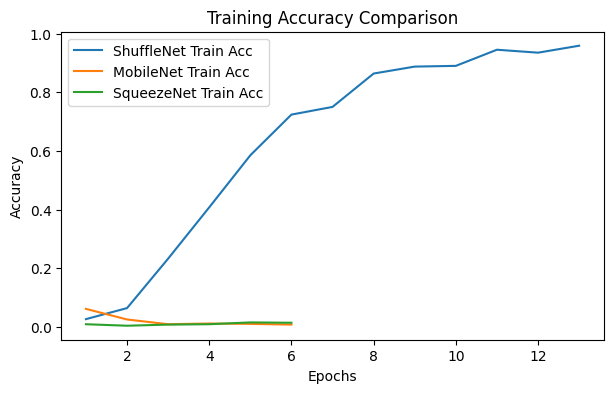

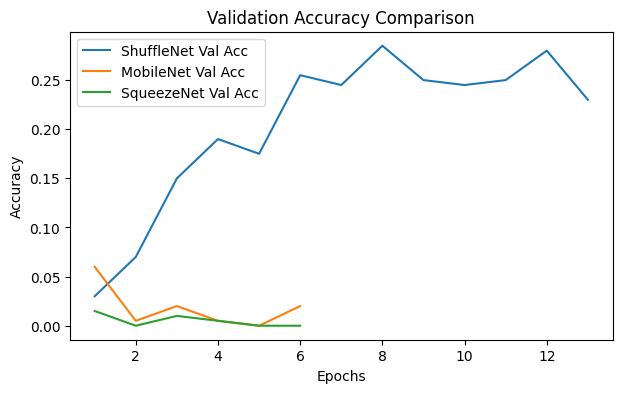

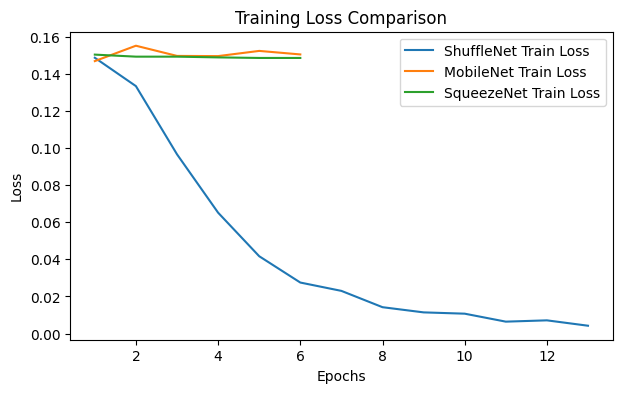

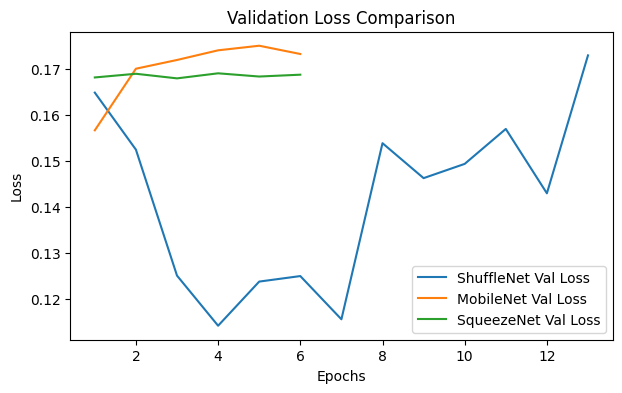

In [107]:
import matplotlib.pyplot as plt

# Data for ShuffleNet
shuffle_val_acc = [0.0300, 0.0700, 0.1500, 0.1900, 0.1750, 0.2550, 0.2450, 0.2850, 0.2500, 0.2450, 0.2500, 0.2800, 0.2300]
shuffle_val_loss = [0.1649, 0.1525, 0.1251, 0.1142, 0.1238, 0.1250, 0.1156, 0.1539, 0.1463, 0.1494, 0.1570, 0.1430, 0.1730]
shuffle_train_acc = [0.0262, 0.0638, 0.2325, 0.4075, 0.5850, 0.7238, 0.7500, 0.8638, 0.8875, 0.8900, 0.9450, 0.9350, 0.9587]
shuffle_train_loss = [0.1488, 0.1335, 0.0967, 0.0652, 0.0417, 0.0275, 0.0230, 0.0142, 0.0114, 0.0107, 0.0064, 0.0071, 0.0042]

# Data for MobileNet
mobile_val_acc = [0.0600, 0.0050, 0.0200, 0.0050, 0.0000, 0.0200]
mobile_val_loss = [0.1567, 0.1701, 0.1720, 0.1741, 0.1751, 0.1733]
mobile_train_acc = [0.0612, 0.0250, 0.0088, 0.0112, 0.0100, 0.0075]
mobile_train_loss = [0.1470, 0.1553, 0.1498, 0.1497, 0.1525, 0.1506]

# Data for SqueezeNet
squeeze_val_acc = [0.0150, 0.0000, 0.0100, 0.0050, 0.0000, 0.0000]
squeeze_val_loss = [0.1682, 0.1690, 0.1680, 0.1691, 0.1684, 0.1688]
squeeze_train_acc = [0.0088, 0.0037, 0.0075, 0.0088, 0.0150, 0.0138]
squeeze_train_loss = [0.1505, 0.1494, 0.1494, 0.1490, 0.1487, 0.1487]

# Plot for Training Accuracy
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(range(1, len(shuffle_train_acc) + 1), shuffle_train_acc, label='ShuffleNet Train Acc')
ax.plot(range(1, len(mobile_train_acc) + 1), mobile_train_acc, label='MobileNet Train Acc')
ax.plot(range(1, len(squeeze_train_acc) + 1), squeeze_train_acc, label='SqueezeNet Train Acc')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Training Accuracy Comparison')
ax.legend()

# Plot for Validation Accuracy
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(range(1, len(shuffle_val_acc) + 1), shuffle_val_acc, label='ShuffleNet Val Acc')
ax.plot(range(1, len(mobile_val_acc) + 1), mobile_val_acc, label='MobileNet Val Acc')
ax.plot(range(1, len(squeeze_val_acc) + 1), squeeze_val_acc, label='SqueezeNet Val Acc')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Validation Accuracy Comparison')
ax.legend()

# Plot for Training Loss
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(range(1, len(shuffle_train_loss) + 1), shuffle_train_loss, label='ShuffleNet Train Loss')
ax.plot(range(1, len(mobile_train_loss) + 1), mobile_train_loss, label='MobileNet Train Loss')
ax.plot(range(1, len(squeeze_train_loss) + 1), squeeze_train_loss, label='SqueezeNet Train Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Training Loss Comparison')
ax.legend()

# Plot for Validation Loss
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(range(1, len(shuffle_val_loss) + 1), shuffle_val_loss, label='ShuffleNet Val Loss')
ax.plot(range(1, len(mobile_val_loss) + 1), mobile_val_loss, label='MobileNet Val Loss')
ax.plot(range(1, len(squeeze_val_loss) + 1), squeeze_val_loss, label='SqueezeNet Val Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Validation Loss Comparison')
ax.legend()

plt.show()

# Making and evaluating predictions using a trained model
# `SHUFFLENET`

In [109]:
# Make predictions on the validation data
trained_model_shufflenet.eval()
predictions = []
ground_truth = []
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = trained_model_shufflenet(inputs)
        predictions.extend(outputs.cpu().numpy())
        ground_truth.extend(labels.cpu().numpy())

predictions = np.array(predictions)
ground_truth = np.array(ground_truth)

In [110]:
print(predictions)

[[-12.485508  -15.5450945 -23.033937  ... -29.878046  -15.274701
  -12.180475 ]
 [ -2.6188405 -15.307777  -11.525523  ... -28.439756  -15.40671
  -13.894076 ]
 [-21.519907   -9.218843  -20.359943  ... -12.865822  -14.848858
  -12.919282 ]
 ...
 [-19.620779  -19.536518  -10.028928  ... -25.92463   -17.769106
  -17.606567 ]
 [-20.845219  -25.55004   -28.096626  ... -32.598896  -19.168491
   -9.608457 ]
 [-25.859379  -34.391502  -24.943676  ... -34.182808  -19.760996
  -22.363514 ]]


In [111]:
print(ground_truth)

[ 26  96   8  15   3  10  62  82  92  16 119  16 119 117  39 105  56   2
 112  58  44  94  26  13 115  97  65  81  27  37  35 113 113  74  43 101
 115  38  74  66  67 118  39  33 110  54  19 105  76  29 104 112  79  88
  10   0  17  99  28  67  76 118   1  38  48  35   7  22  94   3  74  78
  15  84  28   3  34  54  72  31  88  56  85   5  34 101 108  93  79  86
  39  87 119 113  71  57  33  42   6  51  14  11 118   5  29  90 102  70
  18  25  32   9  36  35  93  94 104  40  85 114   9  63  91  81  97  79
  81  35  33  63  97  32  11  64 115  48  57  28  49  24   0  64  94 110
   1  44  24  60  32  21 106  83  94   8  98  28 117   1  46  22 110  13
  10   5   2  61  10  23  31  87  63   7  93  34  11  98 117 103  87  51
  58  20   1  13  60  56  51  29  13 111 106  38 112  72  75  87  99  15
  73   5]


In [112]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[-31.00535   -21.882137   -4.155622  -20.027159  -11.8838415  -8.015835
 -29.509357   -9.590424   -2.2436996  -7.8392434 -26.45076   -13.644707
  -9.797436  -13.1443815  -4.254382   -9.487137  -34.59829   -18.14332
 -21.957436  -16.81714   -28.833143   -2.5792947 -13.682216  -32.595573
  -7.0842223  -9.875824  -36.49115   -13.929644  -17.115328  -18.555635
 -27.31713   -24.995796  -30.430563  -13.942116  -28.509876  -22.041986
  -6.89165   -11.8943405 -21.693016    2.50042   -24.12376   -28.743877
  -5.611504  -24.582306  -21.638678  -26.882534  -14.572977  -15.777472
 -33.143     -10.00211   -18.259735  -18.959969  -19.01166    -5.963169
 -33.430344   -6.164471  -24.941505  -19.156992  -24.154995  -27.186707
 -18.246803  -26.534607  -44.93701   -24.641794  -30.94685   -46.41586
 -33.412796  -22.588305  -14.062788  -13.527788  -41.582565  -23.819983
 -16.506538  -35.907696  -18.858198  -22.413649  -43.166374  -21.524538
 -34.07437   -30.926245  -16.995956  -34.02777   -24.378105  -23.2

In [113]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """
    return unique_breeds[np.argmax(prediction_probabilities)]

In [114]:
# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
print(pred_label)

dhole


In [115]:
# Get a predicted label based on an array of truth probabilities
truth_label = get_pred_label(ground_truth[81])
print(pred_label)

dhole


In [116]:
# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[23])
print(pred_label)


welsh_springer_spaniel


In [117]:
# Get a predicted label based on an array of truth probabilities
truth_label = get_pred_label(ground_truth[23])
print(pred_label)

welsh_springer_spaniel


# Now Making Some Visualizations

In [118]:
# Create a function to unbatch a batch dataset
def unbatchify(data_loader):
    """
    Takes a batched dataset and returns separate arrays of images and labels.
    """
    images = []
    labels = []
    for image_batch, label_batch in data_loader:
        images.extend(image_batch.cpu().numpy())
        labels.extend(label_batch.cpu().numpy())
    return np.array(images), np.array(labels)

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_loader)
print(val_images.shape, val_labels.shape)

(200, 3, 224, 224) (200,)


In [119]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediction, ground truth and image for sample n
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

    # Get the pred label
    pred_label = get_pred_label(pred_prob)

    # Plot image & remove ticks
    plt.imshow(image.transpose(1, 2, 0))  # Transpose for correct channel order
    plt.xticks([])
    plt.yticks([])

    # Change the colour of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Change plot title to be predicted, probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                      np.max(pred_prob) * 100,
                                      true_label),
              color=color)

In [120]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    Plus the top 10 highest prediction confidences along with the truth label for sample n.
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # Get the predicted label
    pred_label = get_pred_label(pred_prob)

    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation="vertical")
    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

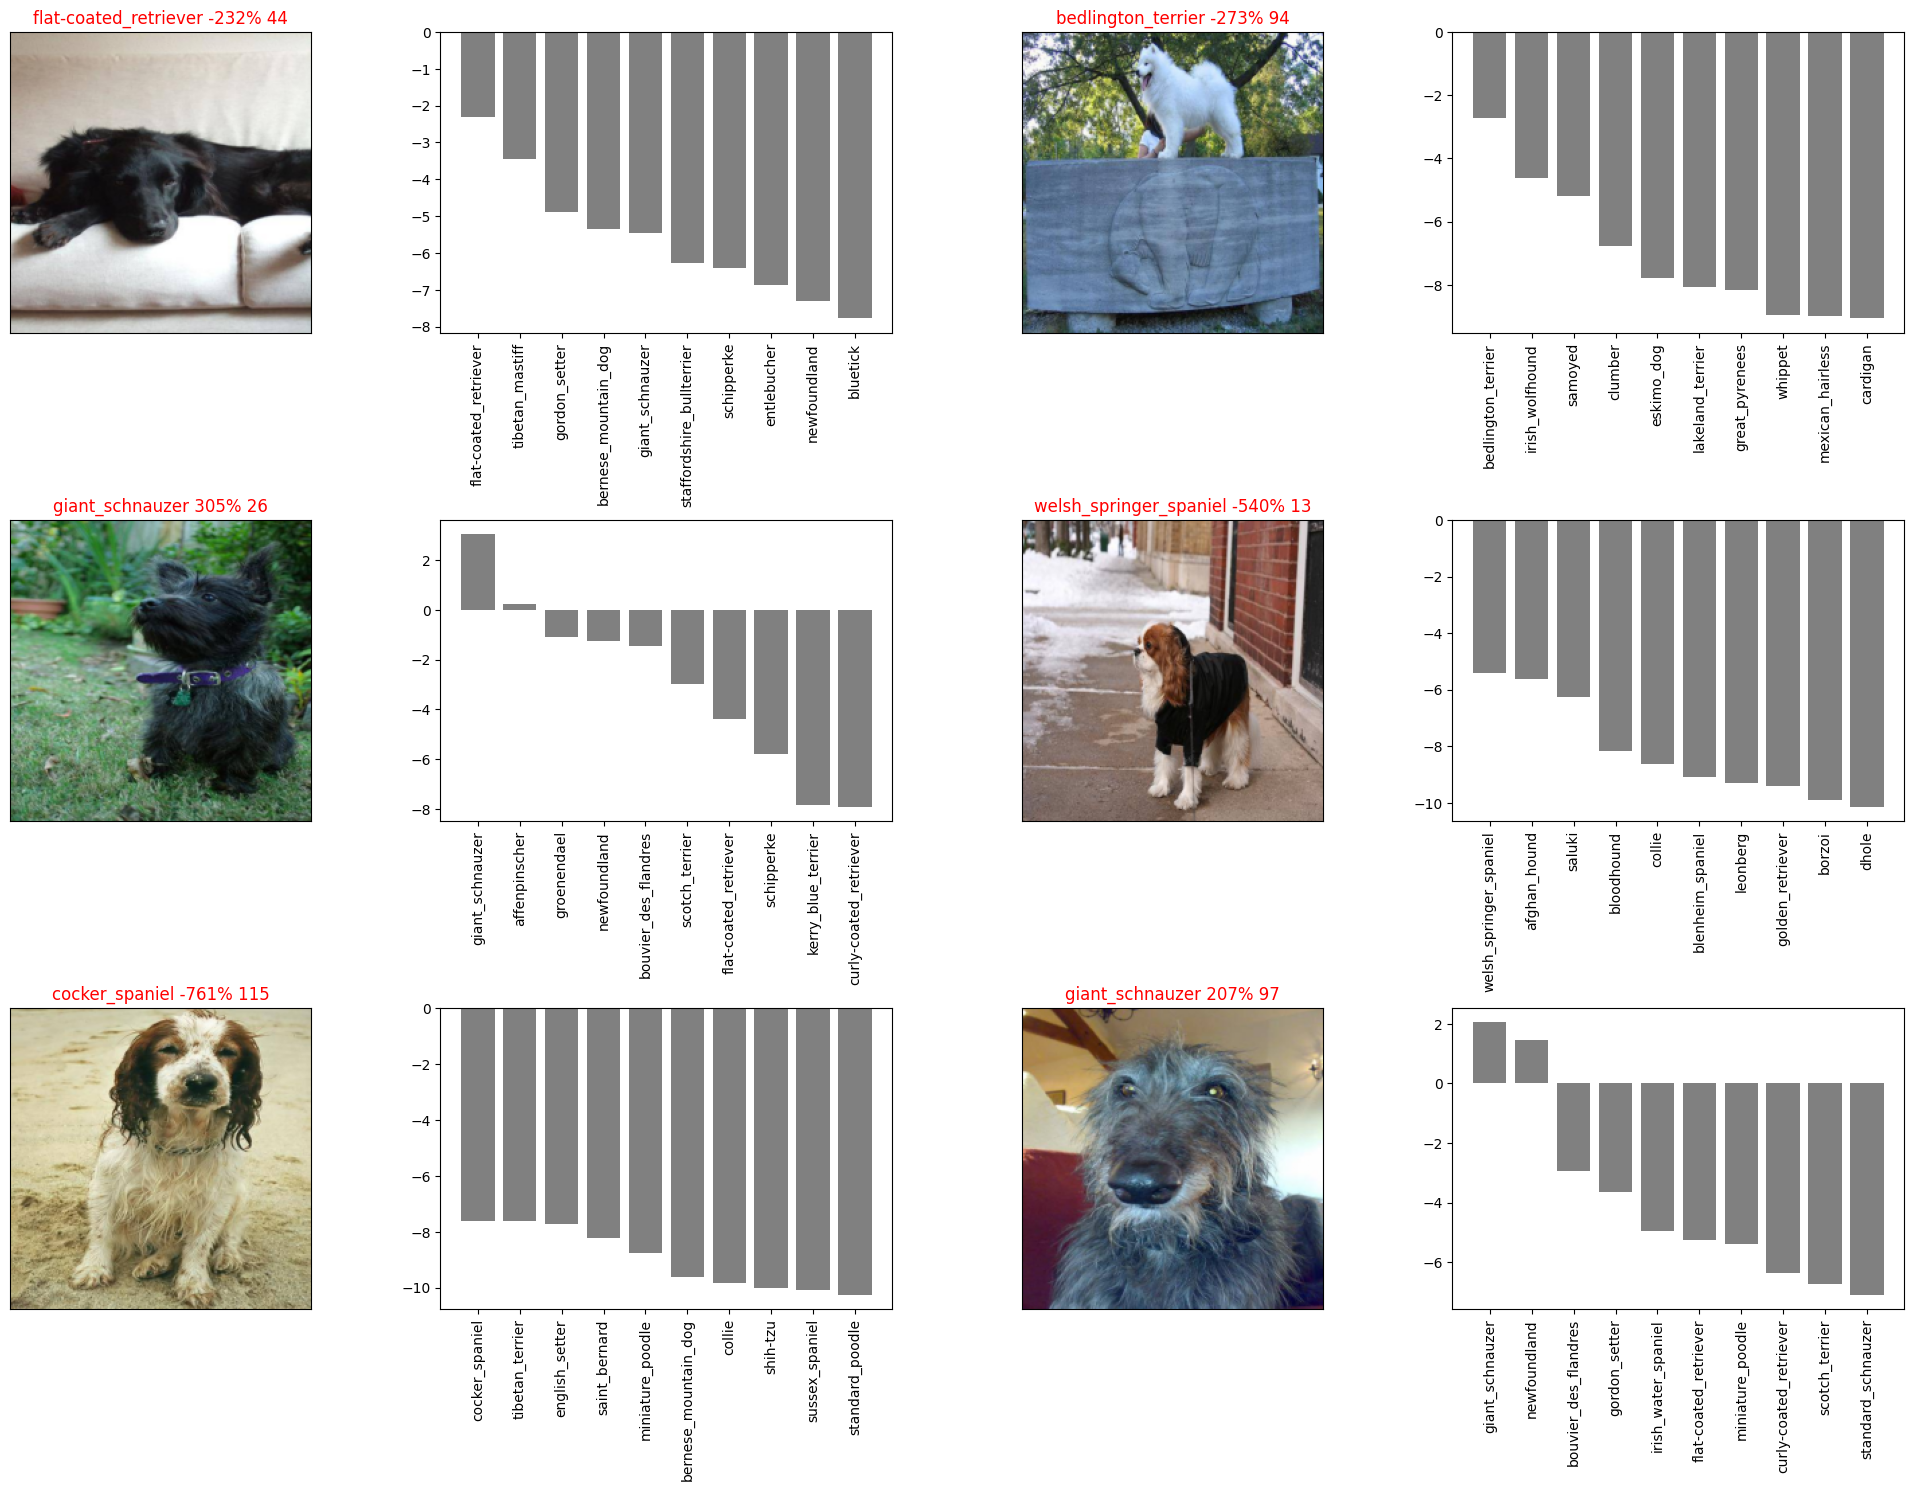

In [121]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10 * num_cols, 5 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=i + i_multiplier)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_pred_conf(prediction_probabilities=predictions,
                   labels=val_labels,
                   n=i + i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# Training a big dog model 🐶 (on the full data)

In [122]:
len(X),len(y)

(10222, 10222)

In [123]:
import numpy as np



# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X[:5000],
                                                  integer_labels[:5000],
                                                  test_size=0.1,
                                                  random_state=42)

# Create data loaders
train_dataset = TensorDataset(torch.stack([process_image(path) for path in X_train]), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.stack([process_image(path) for path in X_val]), torch.tensor(y_val, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training the best model on entire dataset which is ` Shufflenet `

In [124]:
#train the model on now larger amount of data

trained_model_shufflenet_big_data = train_model(model_shufflenet, train_loader, val_loader, patience=5)

Epoch 1/100, Train Loss: 0.0977, Train Acc: 0.3293, Val Loss: 0.0742, Val Acc: 0.4120
Epoch 2/100, Train Loss: 0.0641, Train Acc: 0.4187, Val Loss: 0.0604, Val Acc: 0.4680
Epoch 3/100, Train Loss: 0.0415, Train Acc: 0.5898, Val Loss: 0.0566, Val Acc: 0.4800
Epoch 4/100, Train Loss: 0.0328, Train Acc: 0.6573, Val Loss: 0.0615, Val Acc: 0.4700
Epoch 5/100, Train Loss: 0.0278, Train Acc: 0.7016, Val Loss: 0.0571, Val Acc: 0.5120
Epoch 6/100, Train Loss: 0.0217, Train Acc: 0.7804, Val Loss: 0.0698, Val Acc: 0.4540
Epoch 7/100, Train Loss: 0.0196, Train Acc: 0.7967, Val Loss: 0.0603, Val Acc: 0.5280
Epoch 8/100, Train Loss: 0.0158, Train Acc: 0.8322, Val Loss: 0.0678, Val Acc: 0.4980
Epoch 9/100, Train Loss: 0.0148, Train Acc: 0.8431, Val Loss: 0.0729, Val Acc: 0.5100
Epoch 10/100, Train Loss: 0.0131, Train Acc: 0.8604, Val Loss: 0.0876, Val Acc: 0.4780
Epoch 11/100, Train Loss: 0.0115, Train Acc: 0.8787, Val Loss: 0.0734, Val Acc: 0.4920
Epoch 12/100, Train Loss: 0.0110, Train Acc: 0.8856,

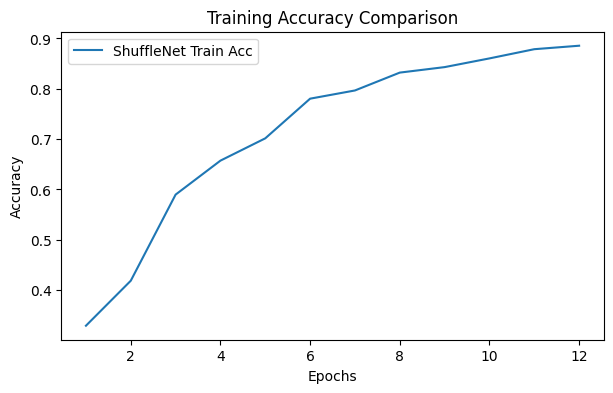

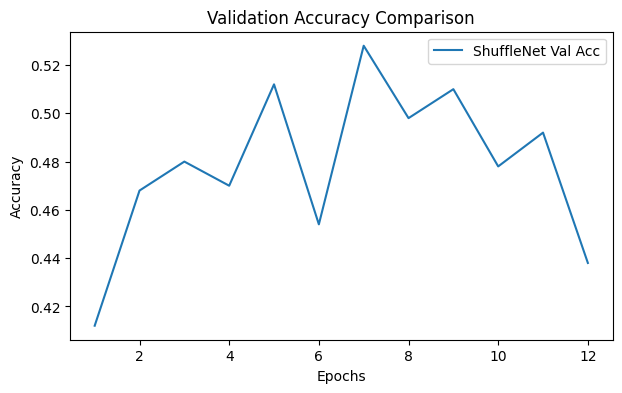

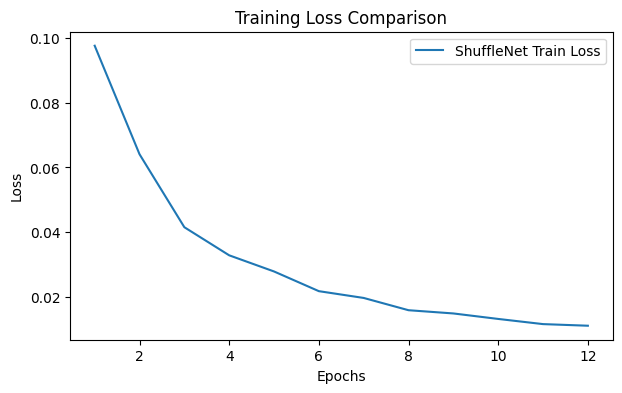

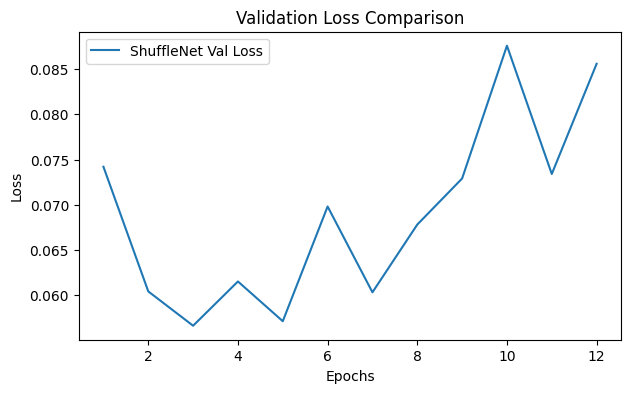

In [186]:
# Data for ShuffleNet
shuffle_val_acc = [0.4120, 0.4680, 0.4800, 0.4700, 0.5120, 0.4540, 0.5280, 0.4980, 0.5100, 0.4780, 0.4920, 0.4380]
shuffle_val_loss = [0.0742, 0.0604, 0.0566, 0.0615, 0.0571, 0.0698, 0.0603, 0.0678, 0.0729, 0.0876, 0.0734, 0.0856]
shuffle_train_acc = [0.3293, 0.4187, 0.5898, 0.6573, 0.7016, 0.7804, 0.7967, 0.8322, 0.8431, 0.8604, 0.8787, 0.8856]
shuffle_train_loss = [0.0977, 0.0641, 0.0415, 0.0328, 0.0278, 0.0217, 0.0196, 0.0158, 0.0148, 0.0131, 0.0115, 0.0110]

# Plot for Training Accuracy
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(range(1, len(shuffle_train_acc) + 1), shuffle_train_acc, label='ShuffleNet Train Acc')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Training Accuracy Comparison')
ax.legend()

# Plot for Validation Accuracy
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(range(1, len(shuffle_val_acc) + 1), shuffle_val_acc, label='ShuffleNet Val Acc')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Validation Accuracy Comparison')
ax.legend()

# Plot for Training Loss
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(range(1, len(shuffle_train_loss) + 1), shuffle_train_loss, label='ShuffleNet Train Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Training Loss Comparison')
ax.legend()

# Plot for Validation Loss
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(range(1, len(shuffle_val_loss) + 1), shuffle_val_loss, label='ShuffleNet Val Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Validation Loss Comparison')
ax.legend()

plt.show()

# Making Predictions On Test Data

In [125]:
# Load test image filenames
test_path = "drive/MyDrive/DOG VISION/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/DOG VISION/test/de15c21ba0a1f139d26223d5e2b09703.jpg',
 'drive/MyDrive/DOG VISION/test/e6d6ff5b33e6174158d5ab05a7eda95c.jpg',
 'drive/MyDrive/DOG VISION/test/e519e383a6efec0abd285beda04aeac9.jpg',
 'drive/MyDrive/DOG VISION/test/e5ded7a736b3336729463af8d74a09c9.jpg',
 'drive/MyDrive/DOG VISION/test/e7041fdc87517192097e62b3822309b7.jpg',
 'drive/MyDrive/DOG VISION/test/dccf2e91f79396055e7ff83f1f207fbc.jpg',
 'drive/MyDrive/DOG VISION/test/e520e4cd7608c47cd9017bb87e88f334.jpg',
 'drive/MyDrive/DOG VISION/test/e774fbfeb4b712ca042f93edea3835af.jpg',
 'drive/MyDrive/DOG VISION/test/e18db768bc1a9e7e633940dcadacb231.jpg',
 'drive/MyDrive/DOG VISION/test/e35b90290702042d17ceee2aaf2d1475.jpg']

In [126]:
len(test_filenames)

10357

In [137]:
import numpy as np



# Create data loaders
test_dataset = TensorDataset(torch.stack([process_image(path) for path in test_filenames[:100]]))
test_loader = DataLoader(test_dataset, batch_size=32)


In [140]:
# Make predictions on the Test data
test_predictions = []
with torch.no_grad():
    for inputs in test_loader:
        # Concatenate tensors in the batch along the batch dimension
        concatenated_inputs = torch.cat(inputs, dim=0)
        # Pass the concatenated tensor to the model
        outputs = trained_model_shufflenet_big_data(concatenated_inputs)
        test_predictions.extend(outputs.cpu().numpy())


test_predictions = np.array(test_predictions)

In [141]:
print(test_predictions)

[[-33.842087 -30.269794 -37.213257 ...  -9.784657 -35.124313 -33.24391 ]
 [-20.268343 -19.602772 -28.189644 ... -12.719076 -17.818882 -18.364162]
 [-24.33575  -17.758942 -24.59704  ... -16.289104 -41.740734 -29.471094]
 ...
 [-23.09382  -37.420082 -26.665277 ... -24.065796 -22.13667  -13.198453]
 [-44.910435 -23.492554 -35.94641  ... -18.014011 -15.888924 -41.516575]
 [-19.790821 -20.012558 -30.662786 ... -23.647831 -24.78293  -19.371395]]


# Making predictions on custom images

In [160]:
# Get custom image filepaths
custom_path = "drive/MyDrive/DOG VISION/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [161]:
custom_image_paths

['drive/MyDrive/DOG VISION/my-dog-photos/Labrador-retriever.jpg',
 'drive/MyDrive/DOG VISION/my-dog-photos/images_dog.jpeg',
 'drive/MyDrive/DOG VISION/my-dog-photos/Vostochno_Evropeiskaya_Ovcharka.jpg']

In [171]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


In [164]:

# Create data loaders
custom_dataset = TensorDataset(torch.stack([process_image(path) for path in custom_image_paths[:3]]))
custom_loader = DataLoader(custom_dataset)


In [166]:
# Make predictions on the custom data
custom_predictions = []
with torch.no_grad():
    for inputs in custom_loader:
        # Concatenate tensors in the batch along the batch dimension
        concatenated_inputs = torch.cat(inputs, dim=0)
        # Pass the concatenated tensor to the model
        outputs = trained_model_shufflenet_big_data(concatenated_inputs)
        custom_predictions.extend(outputs.cpu().numpy())


custom_predictions = np.array(custom_predictions)

In [167]:
print(custom_predictions)

[[-29.473663  -19.432823  -27.613615  -17.887142   -0.6388836 -19.59705
  -30.794947  -19.003868  -11.752254   -6.648405  -16.494184  -24.954964
  -14.677244  -23.424677   -9.813647  -12.830473  -21.691162  -13.401803
  -21.083881  -17.765913  -35.926067   -7.04115   -16.99518   -23.793032
   -7.971062   -6.928692  -25.21173   -20.287477   -7.2603135 -16.350574
  -16.672712  -19.6881    -12.110707  -22.466461  -11.741566  -25.417984
  -21.31841   -12.42815   -18.478235  -15.6670265 -13.1086445 -21.940966
  -16.055296  -14.431488  -17.387465  -12.250618  -20.03405   -15.554162
  -27.69554    -6.9207397 -28.509537   -5.099432  -11.55334   -17.714144
  -24.320536  -21.425325  -17.384932  -17.220882  -24.98503   -20.267027
  -12.008649  -30.26792   -35.165535  -19.04601   -33.33444   -36.566345
   -9.233068    1.6171921 -22.246073  -19.866344  -19.694153  -27.40385
  -21.342472  -21.314388  -21.103214  -18.239069  -16.374962  -28.624931
  -18.083363  -26.081554  -21.219255  -35.169743  -24

In [168]:
print(f"Predicted label: {unique_breeds[np.argmax(custom_predictions[0])]}")

Predicted label: labrador_retriever


In [169]:
print(f"Predicted label: {unique_breeds[np.argmax(custom_predictions[1])]}")

Predicted label: golden_retriever


In [170]:
print(f"Predicted label: {unique_breeds[np.argmax(custom_predictions[2])]}")

Predicted label: eskimo_dog


In [176]:
custom_pred_labels=[]

In [177]:
for i in range(3):
  custom_pred_labels.append(unique_breeds[np.argmax(custom_predictions[i])])

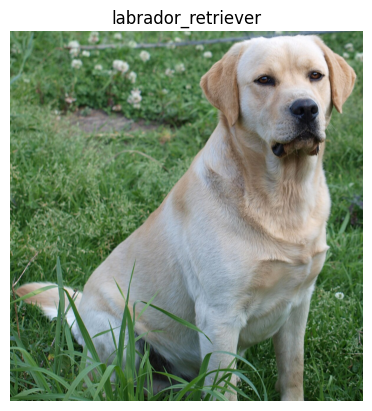

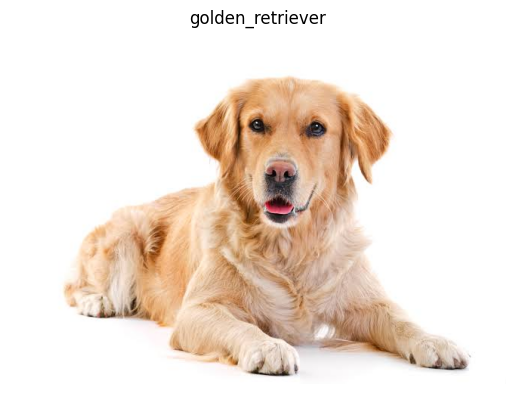

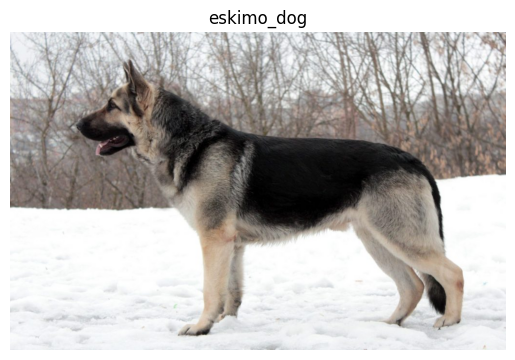

In [182]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the path to the folder containing the images
image_dir = '/content/drive/MyDrive/DOG VISION/my-dog-photos/'

# Iterate over the image paths and custom_pred_labels
for image_path, label in zip(os.listdir(image_dir), custom_pred_labels):
    # Construct the full path to the image
    full_image_path = os.path.join(image_dir, image_path)

    # Load and display the image
    img = mpimg.imread(full_image_path)
    plt.figure()
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()